In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-int-trap)

We will approximate the integral of the function $f(x)=e^{\sin 7x}$ over the interval $[0,2]$.

In [2]:
f = lambda x: exp(sin(7 * x))
a, b = 0, 2

In lieu of the exact value, we will use the `quad` function to find an accurate result.

In [3]:
from scipy.integrate import quad
I, errest = quad(f, a, b, epsabs=1e-13, epsrel=1e-13)
print(f"Integral = {I:.14f}")

Integral = 2.66321978276154


Here is the trapezoid result at $n=40$, and its error.

In [4]:
T, t, y = FNC.trapezoid(f, a, b, 40)
print(f"Trapezoid estimate is {T:.14f} with error {I - T:.2e}")

Trapezoid estimate is 2.66230293560229 with error 9.17e-04


In order to check the order of accuracy, we increase $n$ by orders of magnitude and observe how the error decreases.

In [5]:
n = 40 * 2 ** arange(6)
err = zeros(len(n))
results = PrettyTable(["n", "error"])
for k in range(len(n)):
    T, t, y = FNC.trapezoid(f, a, b, n[k])
    err[k] = I - T
    results.add_row([n[k], err[k]])
print(results)

+------+------------------------+
|  n   |         error          |
+------+------------------------+
|  40  | 0.0009168471592513328  |
|  80  | 0.00023006461762742347 |
| 160  | 5.7567555965309936e-05 |
| 320  | 1.439507279377139e-05  |
| 640  | 3.5989667392932745e-06 |
| 1280 | 8.997540859034814e-07  |
+------+------------------------+


Each increase by a factor of 10 in $n$ cuts the error by a factor of about 100, which is consistent with second-order convergence. Another check is that a log-log graph should give a line of slope $-2$ as $n\to\infty$.

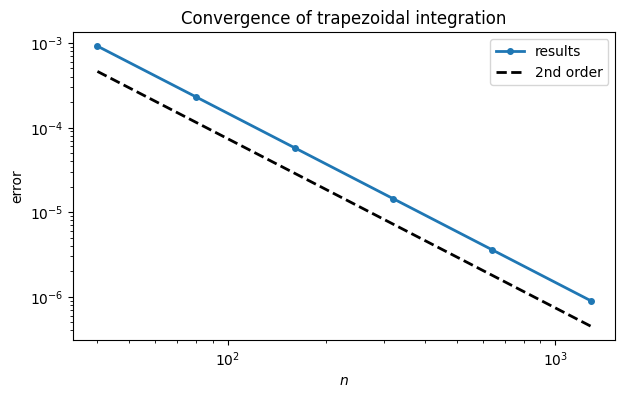

In [8]:
loglog(n, abs(err), "-o", label="results")
loglog(n, 0.5 * err[-1] * (n / n[-1]) ** (-2), "k--", label="2nd order")
xlabel("$n$"),  ylabel("error")
legend()
title("Convergence of trapezoidal integration");
